### Analisis de Dataset de precios de paltas

Vamos a trabajar este kernel analizando un conjunto de datos y aplicando nuestro conocimiento de EDA asi como reconocimiento de funciones utiles de pandas y numpy

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import pylab as pl
sns.set(font_scale = 0.7)
import os
print(os.listdir("../input"))


['avocado.csv']


### Visualizacion de informacion

![Paltas para todos](https://exoticfruitbox.com/wp-content/uploads/2015/10/aguacate.jpg)

## **Analisis de datos**

Para poder trabajar los datos primeros debemos conocer los datos y tipos de datos con los cuales vamos a trabajar, en este caso hemos tomado un Dataset de precios de paltas.

In [2]:
#Cargamos el data set mediante Python y Pandas mediante read_csv
#Tener en cuenta indicadar el separador como recomendacion con delimiter se recomienda
#En caso tengamos un campo donde se guarden los ID unico podemos caolocar elnumero de columna en index_col para usarlo de indexacion
data = pd.read_csv("../input/avocado.csv",delimiter=",",index_col=0)

#Visualizamos el volumen de filas y columnas de nuestros datos
data.shape

(18249, 13)

In [3]:
#Podemos mediante el comando info identificar los tipos de campos 123
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
#Vamos a ver un pequeño resumen de los datos
data.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Como bien indique tenemos que entender los datos y el significado de cada columna correctamente, solo de esa manera podemos avanzar cualquier paso siguiente.

En este caso que nos dice cada columna:

| Nombre | Descripcion  |
|---------|--------------|
| Date | Fecha de observacion  |
| AveragePrice | El precio promedio de cada palta  |
| type | El tipo (conventional or organic)  | 
| year | El año  | 
| Region | La ciudad o region observada  |  
| Total Volume | El volumen total comprado  |  
| 4046 | El numero total de paltas con codigo PLU 4046  |  
| 4225 | El numero total de paltas con codigo PLU 4225 sold  |  
| 4770 | El numero total de paltas con codigo PLU 4770 sold  |  
| Total Bags | El numero total de bolsas vendidas  |  
| Small Bags	| El numero total de bolsas pequeñas  |  
| Large Bags | El numero total de bolsas grandes  |  
| XLarge Bags | El numero total de bolsas extra grandes  |  

Cabe resaltar que

Total Volume = 4046 + 4225 + 4770 + Total Bags

Total Bags = Small Bags + Large Bags + XLarge Bags

Mas informacion de la data en [data](http://www.hassavocadoboard.com/retail/volume-and-price-data)

## **Consistencia de la informacion**

Luego de conocer la informacion vamos a analizar la consistencia de la informacion

In [5]:
#Vamos a validar que se cumple ambos formulas
#Todo aquel registro que no cumpla con la regla pasara a ser una inconsistencia la cual descartaremos.
dataIncorrecta = data[((data['4046'] + data['4225'] + data['4770'] + data['Total Bags']) != data['Total Volume'] ) | ((data['Small Bags'] + data['Large Bags'] + data['XLarge Bags']) != data['Total Bags'] )]
dataCorrecta =  data[((data['4046'] + data['4225'] + data['4770'] + data['Total Bags']) == data['Total Volume'] ) & ((data['Small Bags'] + data['Large Bags'] + data['XLarge Bags']) == data['Total Bags'] )]

dataIncorrecta.reset_index(inplace = True)
dataCorrecta.reset_index(inplace = True)

print("Data Total",data.shape)
print("Data Incorrecta",dataIncorrecta.shape)
print("Data Correcta",dataCorrecta.shape)

Data Total (18249, 13)
Data Incorrecta (8143, 14)
Data Correcta (10106, 14)


In [6]:
#Analizamos valores perdidos en caso de que existan
dataCorrecta.isnull().sum()

index           0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## **Enginner Features**
Vamos a realizar un grafico para extraer las anomalias o valores extremos para poder estandarizar lo mas posible nuestros datos

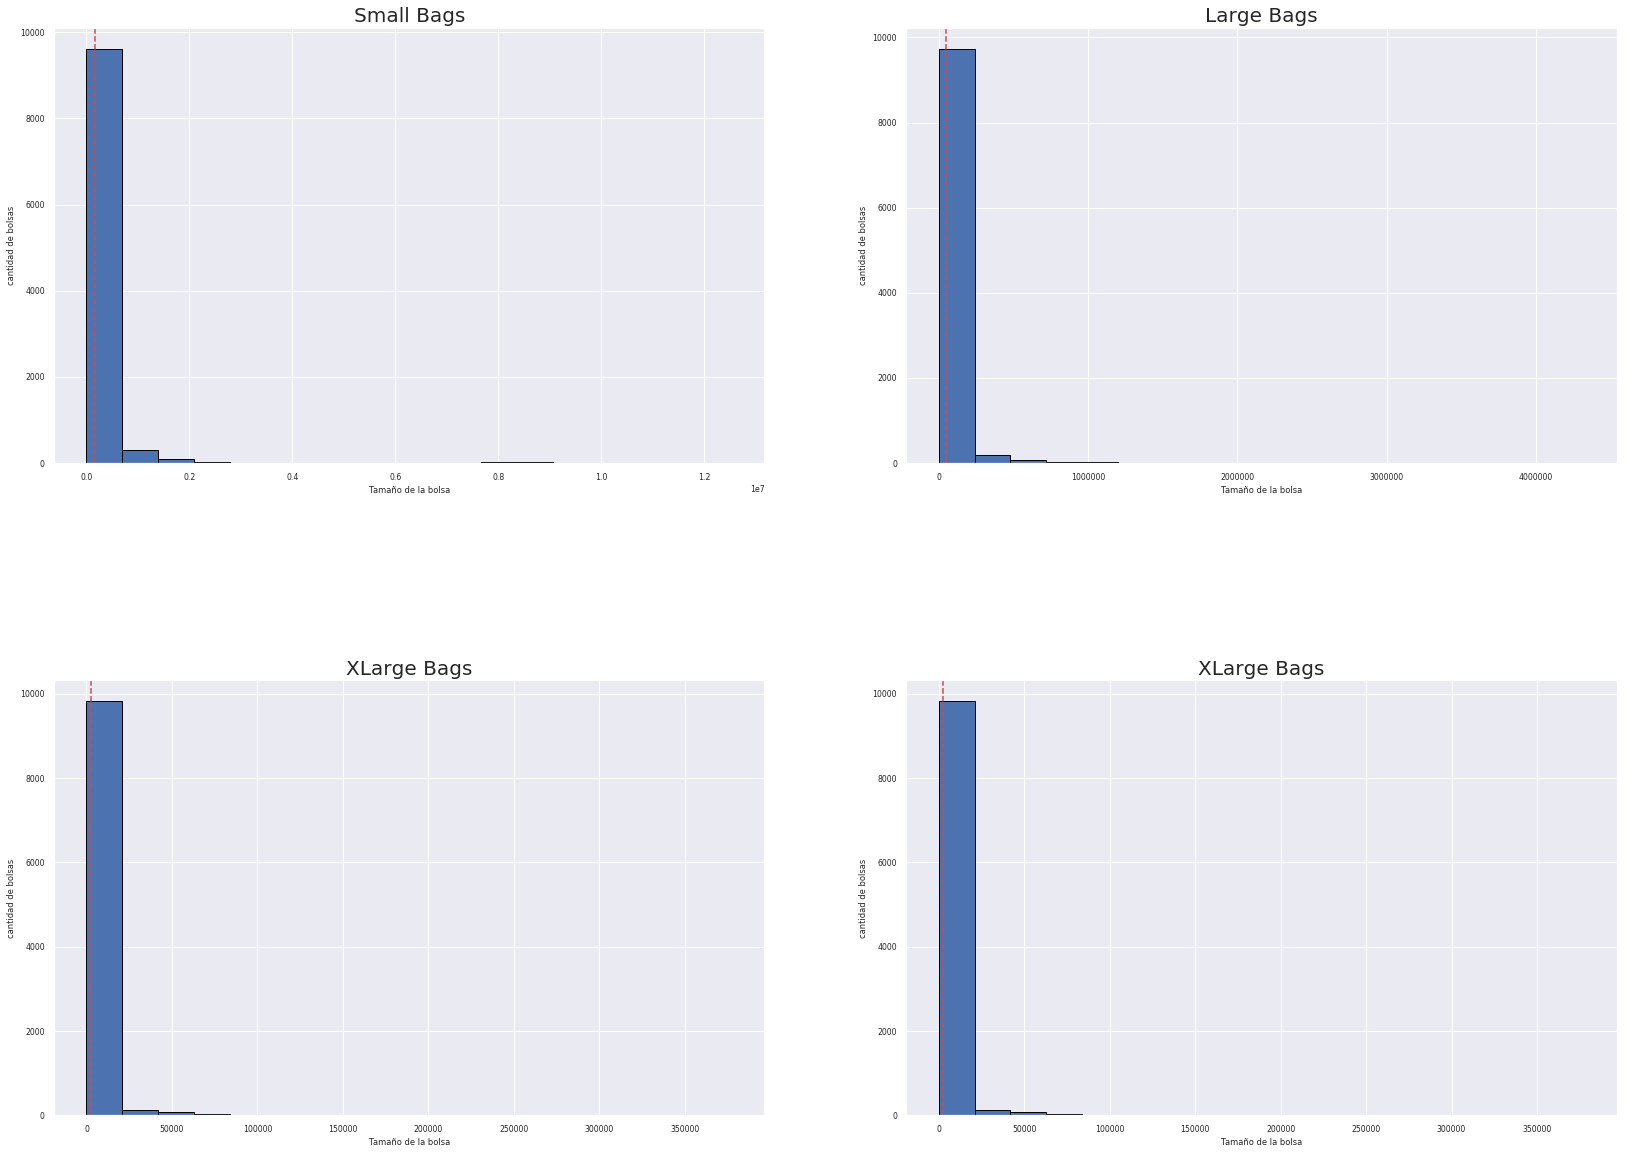

In [7]:
import itertools
plt.subplots(figsize=(28,20))
time_spent=['Small Bags','Large Bags','XLarge Bags','XLarge Bags']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataCorrecta[i].hist(bins=18,edgecolor='black')
    plt.axvline(dataCorrecta[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('Tamaño de la bolsa')
    plt.ylabel('cantidad de bolsas')
plt.show()

In [8]:
dataCorrecta =dataCorrecta[(dataCorrecta['Small Bags']<300000.0) & (dataCorrecta['Large Bags']<150000.0) & (dataCorrecta['XLarge Bags']<10000.0)]
dataCorrecta.shape

(8888, 14)

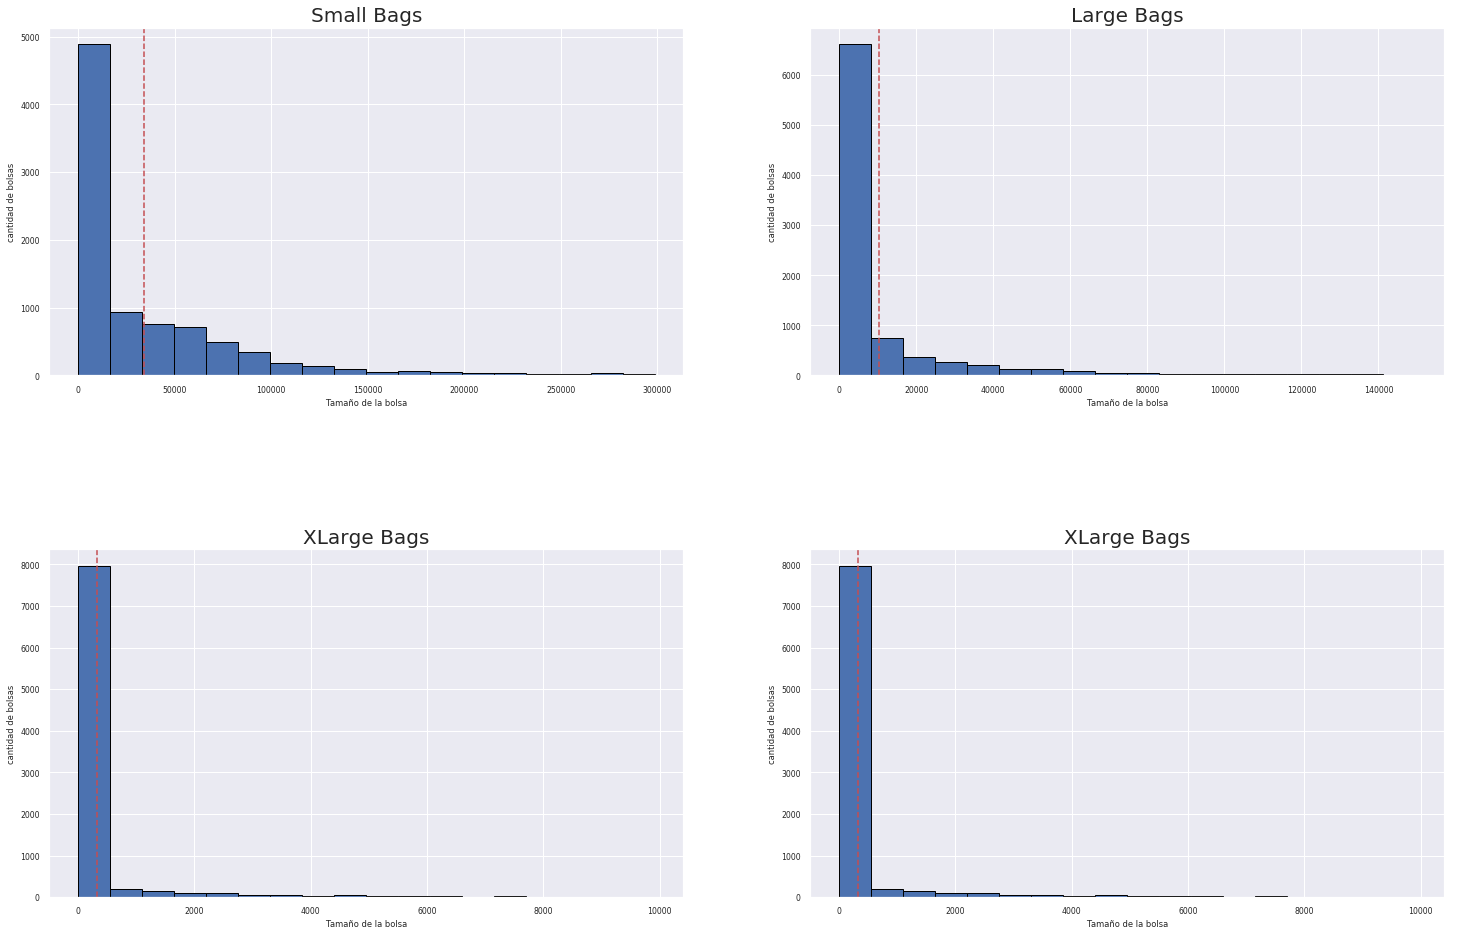

In [9]:
import itertools
plt.subplots(figsize=(25,16))
time_spent=['Small Bags','Large Bags','XLarge Bags','XLarge Bags']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataCorrecta[i].hist(bins=18,edgecolor='black')
    plt.axvline(dataCorrecta[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('Tamaño de la bolsa')
    plt.ylabel('cantidad de bolsas')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



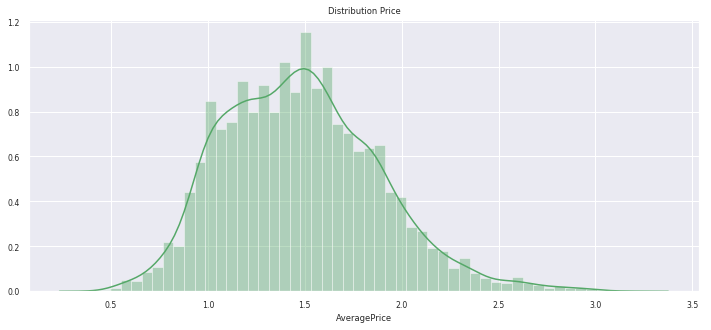

In [10]:
pl.figure(figsize=(12,5))
pl.title("Distribution Price")
ax = sns.distplot(dataCorrecta["AveragePrice"], color = 'g')

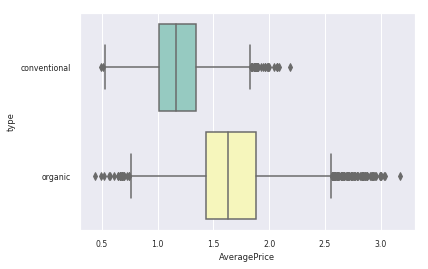

In [11]:
sns.boxplot(y="type", x="AveragePrice", data=dataCorrecta, palette = 'Set3')

In [12]:
conventional = dataCorrecta[dataCorrecta.type=="conventional"]
organic = dataCorrecta[dataCorrecta.type=="organic"]

groupBy1_price = conventional.groupby('Date').mean()
scatter1 = go.Scatter(x=groupBy1_price.AveragePrice.index, y=groupBy1_price.AveragePrice, name="Conventional")

groupBy2_price = organic.groupby('Date').mean()
scatter2 = go.Scatter(x=groupBy2_price.AveragePrice.index, y=groupBy2_price.AveragePrice, name="Organic")

data = [scatter1, scatter2]
layout=go.Layout(title="Time Series Plot for Mean Daily Price of Conventional and Organic Avocados", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [13]:
#dataCorrecta['Date2']=pd.to_datetime(dataCorrecta['Date'], format="%Y/%m/%d")
dataCorrecta['Date'] =dataCorrecta['Date'].astype('datetime64[ns]')



In [14]:
dataCorrecta['type'].value_counts()

organic         5495
conventional    3393
Name: type, dtype: int64

In [15]:
dataCorrecta.head()

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
3,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
4,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany


In [16]:
dataCorrecta['year'].value_counts()

2015    2926
2016    2710
2017    2647
2018     605
Name: year, dtype: int64

In [17]:
dataCorrecta['region'].value_counts()

NorthernNewEngland     221
BuffaloRochester       218
Charlotte              214
Albany                 210
Jacksonville           207
Syracuse               205
Nashville              205
HarrisburgScranton     204
Pittsburgh             200
Spokane                200
Tampa                  199
Boston                 198
Philadelphia           194
Boise                  194
Sacramento             192
Roanoke                191
GrandRapids            191
Orlando                191
RaleighGreensboro      190
NewOrleansMobile       190
SouthCarolina          188
MiamiFtLauderdale      188
SanFrancisco           186
Louisville             186
RichmondNorfolk        184
LasVegas               184
StLouis                184
BaltimoreWashington    183
Chicago                180
Columbus               179
SanDiego               176
Atlanta                173
PhoenixTucson          173
HartfordSpringfield    169
Indianapolis           169
Houston                163
CincinnatiDayton       159
D

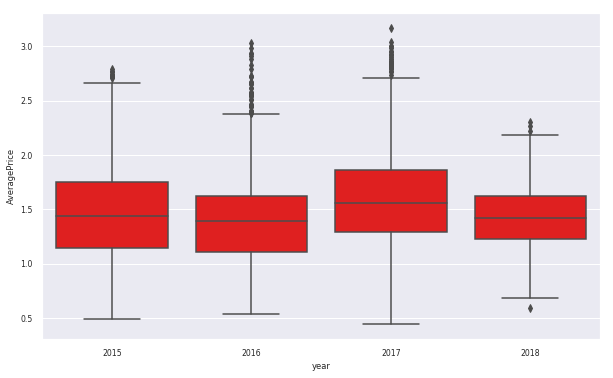

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='year',y='AveragePrice',data=dataCorrecta,color='red')

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



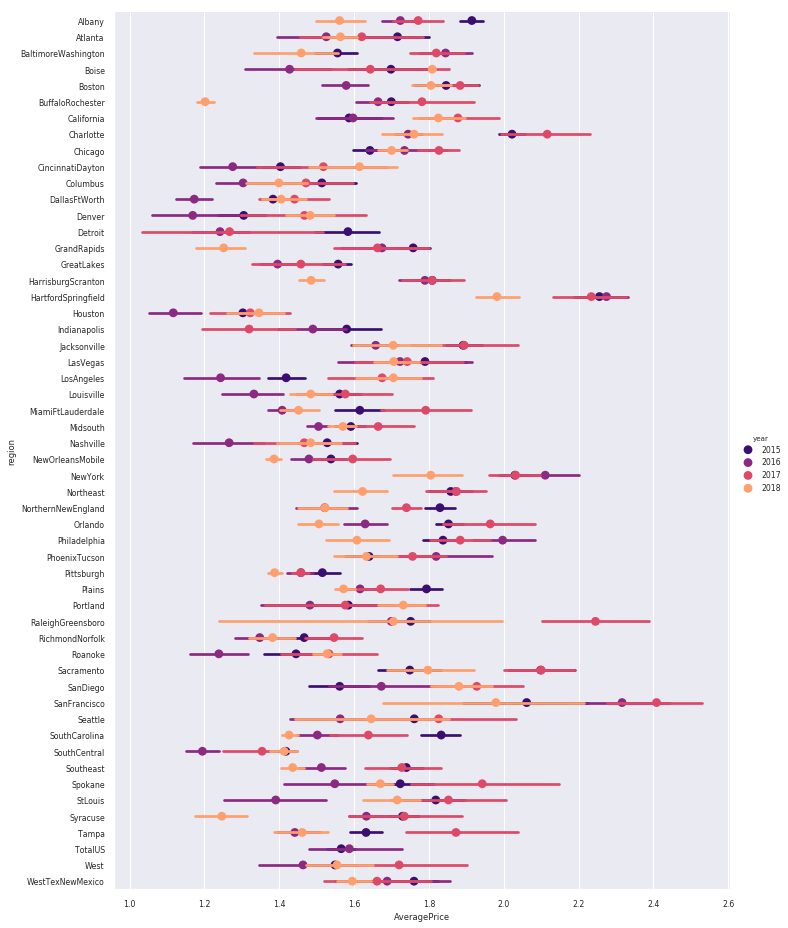

In [19]:
#Analizamos el comportamiento de los precios por region de las paltas organicos
mask = dataCorrecta['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=dataCorrecta[mask],
                   hue='year',
                   height=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



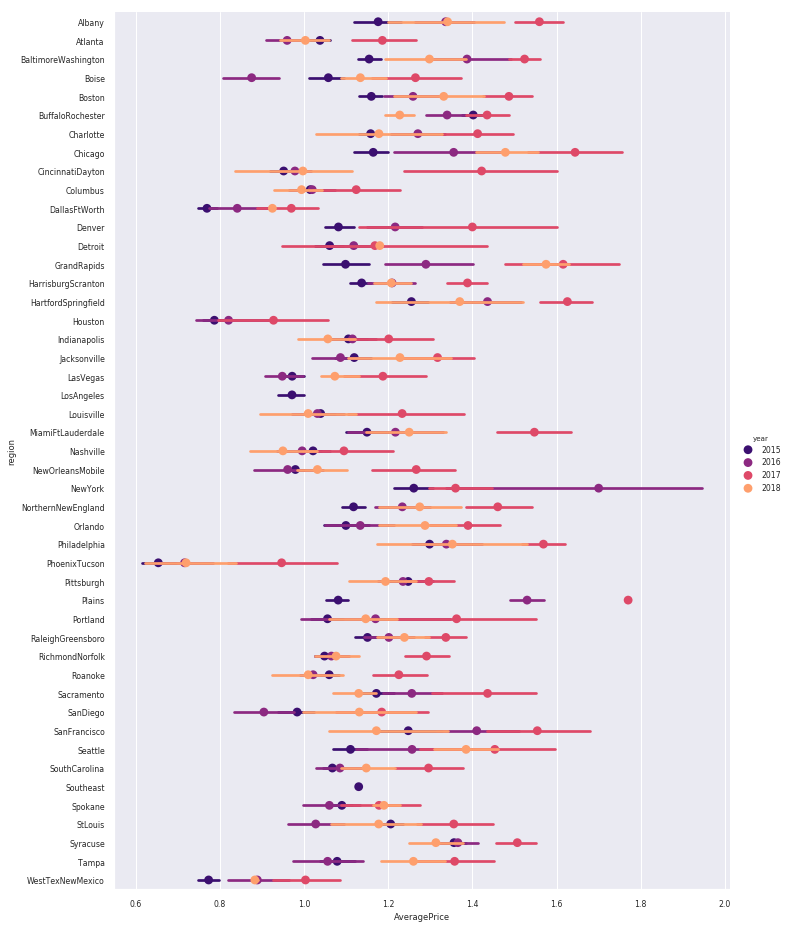

In [20]:
#Analizamos el comportamiento de los precios por region de las paltas convencionales
mask = dataCorrecta['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=dataCorrecta[mask],
                   hue='year',
                   height=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

In [21]:
label = LabelEncoder()
dicts = {}

label.fit(dataCorrecta.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
dataCorrecta.type = label.transform(dataCorrecta.type) 

In [22]:
dataCorrecta['type'].value_counts()

1    5495
0    3393
Name: type, dtype: int64

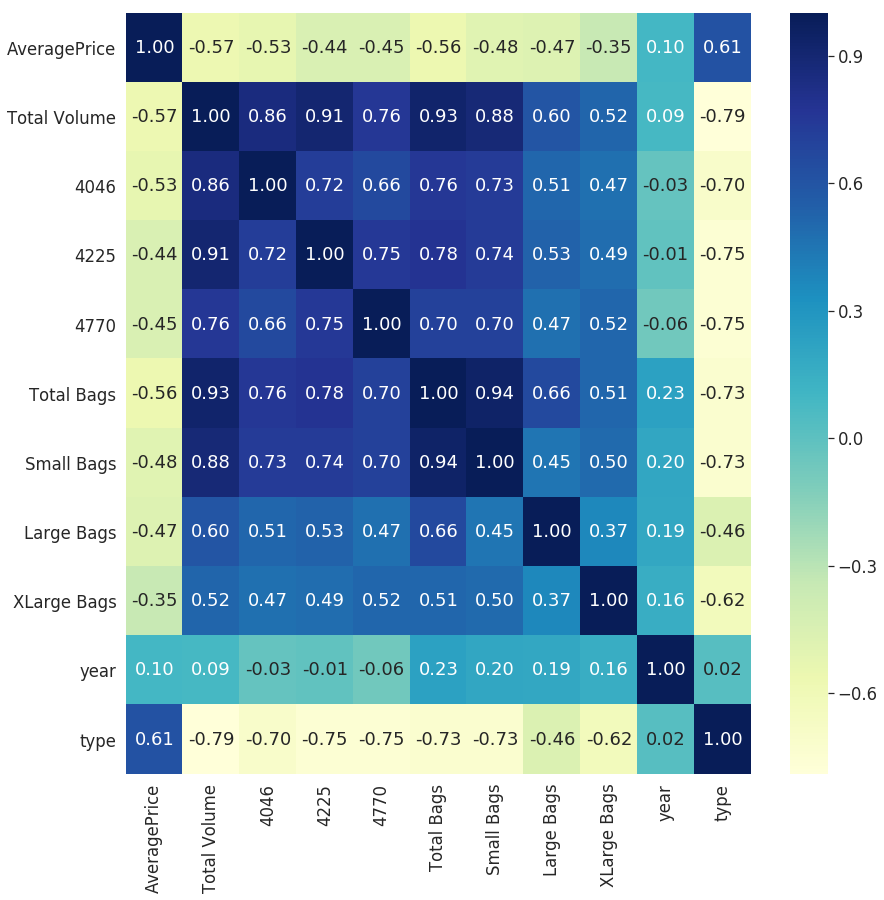

In [23]:
#Realizamos una tabla de correlacion, para conocer el nivel de relacion entre los campos y entre nuestro target
cols = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year','type']
sns.set(font_scale = 1.5)
corr = dataCorrecta[cols].corr('spearman') 
plt.figure(figsize = ( 14 , 14 )) 
sns.heatmap(corr,annot=True,fmt='.2f',cmap="YlGnBu");

In [24]:
#Creamos las variables ficticias para region
region_dummi =pd.get_dummies(dataCorrecta['region'], prefix='reg')
region_dummi.head()

,reg_Albany,reg_Atlanta,reg_BaltimoreWashington,reg_Boise,reg_Boston,reg_BuffaloRochester,reg_California,reg_Charlotte,reg_Chicago,reg_CincinnatiDayton,reg_Columbus,reg_DallasFtWorth,reg_Denver,reg_Detroit,reg_GrandRapids,reg_GreatLakes,reg_HarrisburgScranton,reg_HartfordSpringfield,reg_Houston,reg_Indianapolis,reg_Jacksonville,reg_LasVegas,reg_LosAngeles,reg_Louisville,reg_MiamiFtLauderdale,reg_Midsouth,reg_Nashville,reg_NewOrleansMobile,reg_NewYork,reg_Northeast,reg_NorthernNewEngland,reg_Orlando,reg_Philadelphia,reg_PhoenixTucson,reg_Pittsburgh,reg_Plains,reg_Portland,reg_RaleighGreensboro,reg_RichmondNorfolk,reg_Roanoke,reg_Sacramento,reg_SanDiego,reg_SanFrancisco,reg_Seattle,reg_SouthCarolina,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#Agregamos los datos fictios a la data original
data_nueva = pd.concat([dataCorrecta, region_dummi], axis=1)
data_nueva.head() 

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,reg_Albany,reg_Atlanta,reg_BaltimoreWashington,reg_Boise,reg_Boston,reg_BuffaloRochester,reg_California,reg_Charlotte,reg_Chicago,reg_CincinnatiDayton,reg_Columbus,reg_DallasFtWorth,reg_Denver,reg_Detroit,reg_GrandRapids,reg_GreatLakes,reg_HarrisburgScranton,reg_HartfordSpringfield,reg_Houston,reg_Indianapolis,reg_Jacksonville,reg_LasVegas,reg_LosAngeles,reg_Louisville,reg_MiamiFtLauderdale,reg_Midsouth,reg_Nashville,reg_NewOrleansMobile,reg_NewYork,reg_Northeast,reg_NorthernNewEngland,reg_Orlando,reg_Philadelphia,reg_PhoenixTucson,reg_Pittsburgh,reg_Plains,reg_Portland,reg_RaleighGreensboro,reg_RichmondNorfolk,reg_Roanoke,reg_Sacramento,reg_SanDiego,reg_SanFrancisco,reg_Seattle,reg_SouthCarolina,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,2015,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,2015,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#eliminamos las columna region
data_nueva = data_nueva.drop('region', 1)
data_nueva = data_nueva.drop('index', 1)

In [27]:
data_train = pd.DataFrame(index=data_nueva.index)
targer_train = pd.DataFrame(index=data_nueva.index)
data_train = data_nueva
targer_train = data_nueva['AveragePrice']

In [28]:
data_train['monthy'] = data_train['Date'].astype('datetime64[ns]').apply(lambda ts: ts.month)

In [29]:
dummi_month =pd.get_dummies(data_train['monthy'], prefix='month')
data_train = pd.concat([data_train, dummi_month], axis=1)

In [30]:
data_train = data_train.drop(['monthy'],axis=1)
#data_train = data_train.drop(['Date'],axis=1)

In [31]:
data_train.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,reg_Albany,reg_Atlanta,reg_BaltimoreWashington,reg_Boise,reg_Boston,reg_BuffaloRochester,reg_California,reg_Charlotte,reg_Chicago,reg_CincinnatiDayton,reg_Columbus,reg_DallasFtWorth,reg_Denver,reg_Detroit,reg_GrandRapids,reg_GreatLakes,reg_HarrisburgScranton,reg_HartfordSpringfield,reg_Houston,reg_Indianapolis,reg_Jacksonville,reg_LasVegas,reg_LosAngeles,reg_Louisville,reg_MiamiFtLauderdale,reg_Midsouth,reg_Nashville,reg_NewOrleansMobile,reg_NewYork,reg_Northeast,reg_NorthernNewEngland,reg_Orlando,reg_Philadelphia,reg_PhoenixTucson,reg_Pittsburgh,reg_Plains,reg_Portland,reg_RaleighGreensboro,reg_RichmondNorfolk,reg_Roanoke,reg_Sacramento,reg_SanDiego,reg_SanFrancisco,reg_Seattle,reg_SouthCarolina,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
data_train['year'].value_counts()

2015    2926
2016    2710
2017    2647
2018     605
Name: year, dtype: int64

In [33]:
region_dummi_fecha =pd.get_dummies(data_train['year'], prefix='year')

In [34]:
data_train = pd.concat([data_train, region_dummi_fecha], axis=1)

In [35]:
data_train.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,reg_Albany,reg_Atlanta,reg_BaltimoreWashington,reg_Boise,reg_Boston,reg_BuffaloRochester,reg_California,reg_Charlotte,reg_Chicago,reg_CincinnatiDayton,reg_Columbus,reg_DallasFtWorth,reg_Denver,reg_Detroit,reg_GrandRapids,reg_GreatLakes,reg_HarrisburgScranton,reg_HartfordSpringfield,reg_Houston,reg_Indianapolis,reg_Jacksonville,reg_LasVegas,reg_LosAngeles,reg_Louisville,reg_MiamiFtLauderdale,reg_Midsouth,reg_Nashville,reg_NewOrleansMobile,...,reg_NorthernNewEngland,reg_Orlando,reg_Philadelphia,reg_PhoenixTucson,reg_Pittsburgh,reg_Plains,reg_Portland,reg_RaleighGreensboro,reg_RichmondNorfolk,reg_Roanoke,reg_Sacramento,reg_SanDiego,reg_SanFrancisco,reg_Seattle,reg_SouthCarolina,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [36]:
data_train = data_train.drop(['year'],axis=1)
data_train = data_train.drop(['Date'], axis=1)
data_train = data_train.drop(['AveragePrice'],axis=1)

In [37]:

data_train.head(5)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,reg_Albany,reg_Atlanta,reg_BaltimoreWashington,reg_Boise,reg_Boston,reg_BuffaloRochester,reg_California,reg_Charlotte,reg_Chicago,reg_CincinnatiDayton,reg_Columbus,reg_DallasFtWorth,reg_Denver,reg_Detroit,reg_GrandRapids,reg_GreatLakes,reg_HarrisburgScranton,reg_HartfordSpringfield,reg_Houston,reg_Indianapolis,reg_Jacksonville,reg_LasVegas,reg_LosAngeles,reg_Louisville,reg_MiamiFtLauderdale,reg_Midsouth,reg_Nashville,reg_NewOrleansMobile,reg_NewYork,reg_Northeast,reg_NorthernNewEngland,reg_Orlando,reg_Philadelphia,reg_PhoenixTucson,reg_Pittsburgh,reg_Plains,reg_Portland,reg_RaleighGreensboro,reg_RichmondNorfolk,reg_Roanoke,reg_Sacramento,reg_SanDiego,reg_SanFrancisco,reg_Seattle,reg_SouthCarolina,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [38]:
targer_train.mean()

1.4789187668766879

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



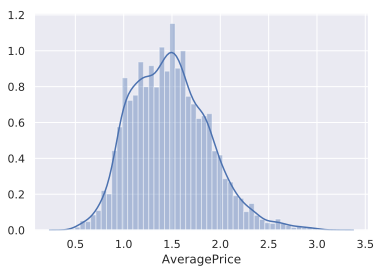

In [39]:
%config InlineBackend.figure_format = 'svg'
sns.set(font_scale = 1)
sns.distplot(targer_train);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



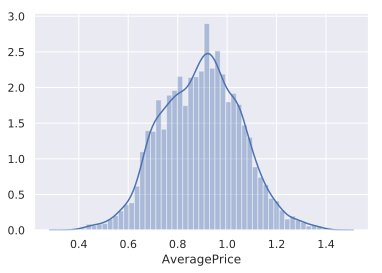

In [40]:
sns.set(font_scale = 1)
sns.distplot(np.log1p(targer_train));

Creamos la separacion entre la data de test y entrenamiento

In [41]:
data_train.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,reg_Albany,reg_Atlanta,reg_BaltimoreWashington,reg_Boise,reg_Boston,reg_BuffaloRochester,reg_California,reg_Charlotte,reg_Chicago,reg_CincinnatiDayton,reg_Columbus,reg_DallasFtWorth,reg_Denver,reg_Detroit,reg_GrandRapids,reg_GreatLakes,reg_HarrisburgScranton,reg_HartfordSpringfield,reg_Houston,reg_Indianapolis,reg_Jacksonville,reg_LasVegas,reg_LosAngeles,reg_Louisville,reg_MiamiFtLauderdale,reg_Midsouth,reg_Nashville,reg_NewOrleansMobile,reg_NewYork,reg_Northeast,reg_NorthernNewEngland,reg_Orlando,reg_Philadelphia,reg_PhoenixTucson,reg_Pittsburgh,reg_Plains,reg_Portland,reg_RaleighGreensboro,reg_RichmondNorfolk,reg_Roanoke,reg_Sacramento,reg_SanDiego,reg_SanFrancisco,reg_Seattle,reg_SouthCarolina,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_train,targer_train,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7110, 79) (7110,)
(1778, 79) (1778,)


## Luego de este punto podemos trabajarlo con un modelo de prediccion
De acuerdo con el modelo de prediccion podemos trabajar los datos para predecir el precio promedio individual, empezamos con el RIDGE

In [43]:
#Probamos con un modelo simple Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=17)
ridge.fit(X_train, y_train);
ridge_pred = ridge.predict(X_test)

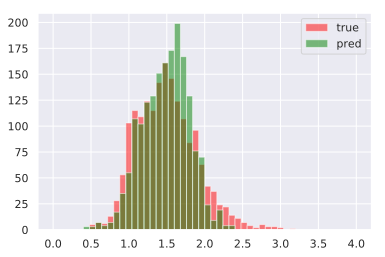

In [44]:
sns.set(font_scale = 1)
plt.hist(y_test, bins=50, alpha=.5, color='red', label='true', range=(0,4));
plt.hist(ridge_pred, bins=50, alpha=.5, color='green', label='pred', range=(0,4));
plt.legend();

In [45]:
mean_absolute_error(y_test, ridge_pred)

0.18671660330252557

In [46]:
from sklearn.metrics import mean_squared_error
1-mean_squared_error(y_test, ridge_pred)

0.9377354540502116

Probamos con varios modelos para determinar el que nos da mejores resultados con la configuracion estandar

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# print X_train.shape, X_test.shape

classifiers = [['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()],
               ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
               ['SVM :', SVR()],
               ['AdaBoostClassifier :', AdaBoostRegressor()],
               ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
               ['Xgboost: ', XGBRegressor()],
               ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
               ['Lasso: ', Lasso()],
               ['Ridge: ', Ridge(random_state=17)],
               ['LineaRegresion: ', LinearRegression()],
               ['BayesianRidge: ', BayesianRidge()],
               ['ElasticNet: ', ElasticNet()],
               ['HuberRegressor: ', HuberRegressor()]]

print("Accuracy Results...")


for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Accuracy Results...
DecisionTree : 0.22309864045882974
RandomForest : 0.1675542589619493
KNeighbours : 0.27684451460041964
SVM : 0.39684089072522905
AdaBoostClassifier : 0.27947201514850095
GradientBoostingClassifier:  0.2214468164616692
Xgboost:  0.22228075173732578
CatBoost:  0.15929521865874552
Lasso:  0.35548548946763714
Ridge:  0.24952864755331874
LineaRegresion:  0.2494948101889431
BayesianRidge:  0.2495993704942637
ElasticNet:  0.3554808230315479
HuberRegressor:  1.3504264333731852


En este caso vamos a tomar el RandomForest y lo probamos de manera individual con el MAE

In [48]:
classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)


In [49]:
mean_absolute_error(y_test, predictions)

0.11687682789651295

,Y Test,Pred
1015,1.04,1.107
3107,1.26,1.362
1864,1.57,1.648
1128,1.03,1.013
4276,1.30,1.160


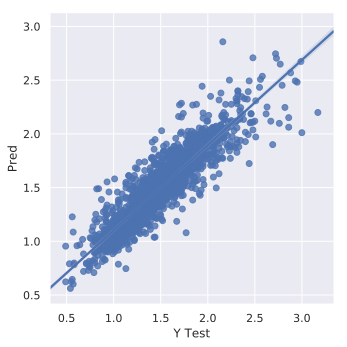

In [50]:
sns.set(font_scale = 1)
data = pd.DataFrame({'Y Test':y_test , 'Pred':predictions},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()